# Dataset ensemble

In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ensembleset.dataset import DataSet
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor

import functions.plotting_functions as plot_funcs

## 1. Data preparation

### 1.1. Load and prepare data

In [2]:
data_df=pd.read_csv('data/calories.csv')
data_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,18917977,1.0,27,181.0,81.0,14.0,86.0,40.5,40.0
1,19407805,1.0,44,182.0,86.0,26.0,107.0,40.7,181.0
2,18111907,0.0,70,172.0,73.0,23.0,102.0,40.8,144.0
3,13610975,1.0,20,188.0,88.0,11.0,101.0,40.1,54.0
4,13505452,0.0,25,161.0,62.0,14.0,95.0,40.5,68.0


In [3]:
data_df.drop('User_ID', axis=1, inplace=True)
train_df, test_df=train_test_split(data_df)
train_df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
2095,0.0,45,169.0,66.0,19.0,97.0,40.5,102.0
1280,0.0,20,155.0,51.0,11.0,98.0,39.7,58.0
5258,0.0,40,157.0,56.0,4.0,87.0,38.4,17.0
5137,0.0,33,169.0,71.0,24.0,104.0,40.9,140.0
8522,0.0,43,175.0,72.0,23.0,100.0,40.7,128.0


### 1.2. Generate ensembleset

In [ ]:
ensemble_members=10

data_ensemble=DataSet(
    label='Calories',
    train_data=train_df,
    test_data=test_df
)

data_ensemble.make_datasets(
    n_datasets=ensemble_members,
    n_features=5,
    n_steps=3
)


Generating dataset 1 of 10
 Applying ratio_features
 Applying difference_features
 Applying spline_features

Generating dataset 2 of 10
 Applying exponential_features
 Applying sum_features
 Applying poly_features

Generating dataset 3 of 10
 Applying poly_features
 Applying spline_features
 Applying log_features

Generating dataset 4 of 10
 Applying ratio_features
 Applying sum_features
 Applying poly_features

Generating dataset 5 of 10
 Applying difference_features
 Applying spline_features
 Applying poly_features

Generating dataset 6 of 10
 Applying log_features
 Applying sum_features
 Applying spline_features

Generating dataset 7 of 10
 Applying ratio_features
 Applying poly_features
 Applying sum_features

Generating dataset 8 of 10
 Applying exponential_features
 Applying ratio_features
 Applying difference_features

Generating dataset 9 of 10
 Applying difference_features
 Applying log_features
 Applying exponential_features

Generating dataset 10 of 10
 Applying ratio_featu

## 2. Gradient boosting: original data

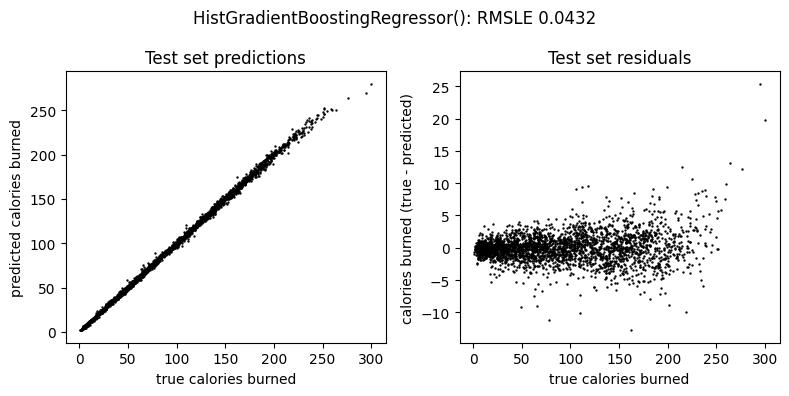

In [7]:
model=HistGradientBoostingRegressor(loss='gamma')
model.fit(train_df.drop('Calories', axis=1), train_df['Calories'])

predictions=model.predict(test_df.drop('Calories', axis=1))
labels=test_df['Calories']
rmsle=np.sqrt(mean_squared_log_error(labels, predictions))

plot_title=f'HistGradientBoostingRegressor(): RMSLE {rmsle:.4f}'
plot_funcs.model_eval(plot_title, 'calories burned', predictions, labels)

## 3. Ensemble model

### 3.1. Stage I

In [ ]:
models={}



with h5py.File('data/dataset.h5', 'r') as hdf:

for 

for name in hdf:
    print(f' {name}: {list(hdf[name])}')

hdf.close()

Datasets:
 test: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'labels']
 train: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'labels']
